In [1]:
# importing libraries to be used in the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Reading csv file

data = pd.read_csv("rawdata.csv", encoding = "unicode_escape")

#using 'unicode_escape' to avoid encoding error

In [6]:
# checking shape of data with rows and columns
data.shape

(11251, 15)

In [7]:
data.head()

User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN       NaN  
3  23912.0     NaN       NaN  
4  23877.0     NaN       NaN

## Data Cleaning

In [8]:
# checking whole data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
# droping un-related/null columns

data.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [13]:
# checking null values in the columns

data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [16]:
# dropping null values

data.dropna(inplace = True)
data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [18]:
# changing datatype of Amount to int

data['Amount'] = data['Amount'].astype('int')

In [20]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [25]:
# checking summary statistics of Numeric columns

data[["Age", "Orders", "Amount"]].describe().T

count         mean          std    min     25%     50%      75%  \
Age     11239.0    35.410357    12.753866   12.0    27.0    33.0     43.0   
Orders  11239.0     2.489634     1.114967    1.0     2.0     2.0      3.0   
Amount  11239.0  9453.610553  5222.355168  188.0  5443.0  8109.0  12675.0   

            max  
Age        92.0  
Orders      4.0  
Amount  23952.0

## Exploratory Data Analysis 


### Sales by Gender

In [26]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

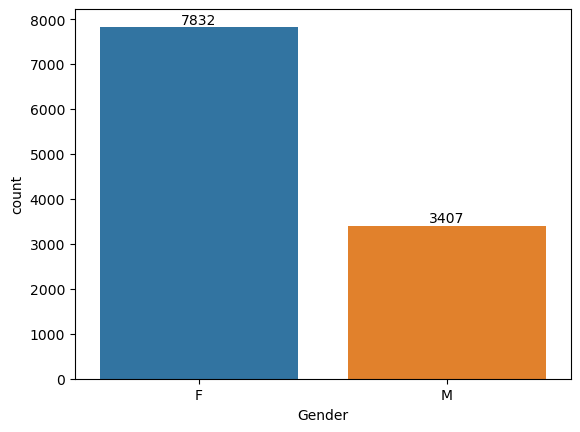

In [28]:
ax = sns.countplot(x = "Gender", data = data)

for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Gender', ylabel='Amount'>

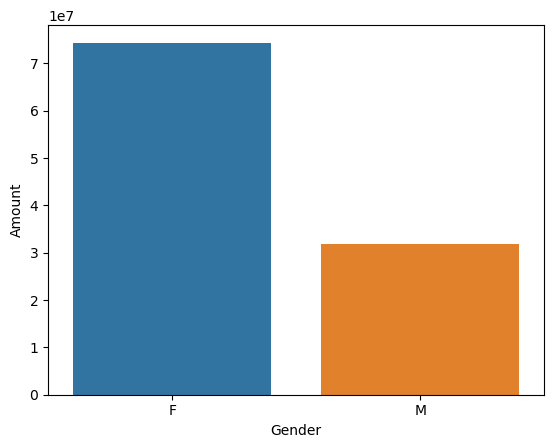

In [29]:
gender_sales = data.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.barplot(x = "Gender", y = "Amount", data = gender_sales)

#### We can see that most of the buyers are females and even the purchasing power of females is greater than men

### Sales by Age 

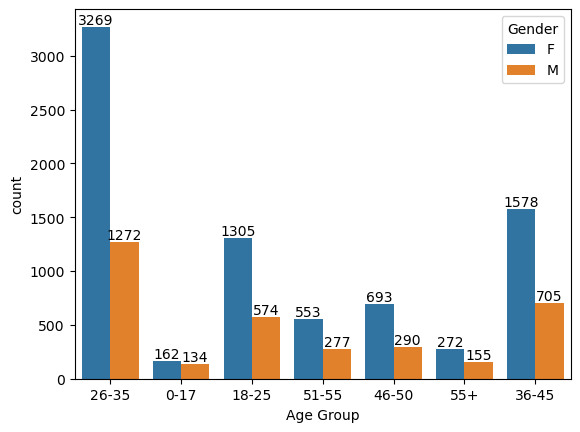

In [31]:
ax = sns.countplot(x = "Age Group", hue = "Gender", data = data)

for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Age Group', ylabel='Amount'>

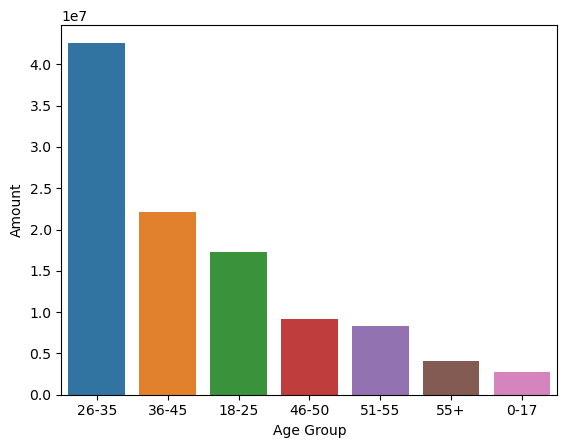

In [32]:
age_sale = data.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount', data = age_sale)

#### Most of the buyers are in age group 26-35

### Sales by State

<Axes: xlabel='State', ylabel='Orders'>

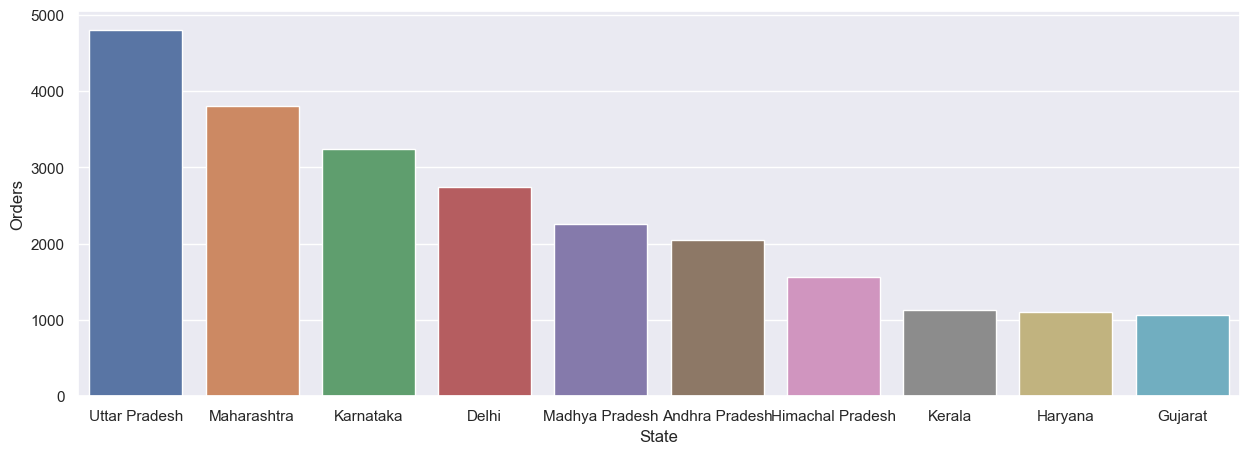

In [48]:
# Total number of Orders by top 10 states

state_order = data.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Orders', data = state_order)

<Axes: xlabel='State', ylabel='Amount'>

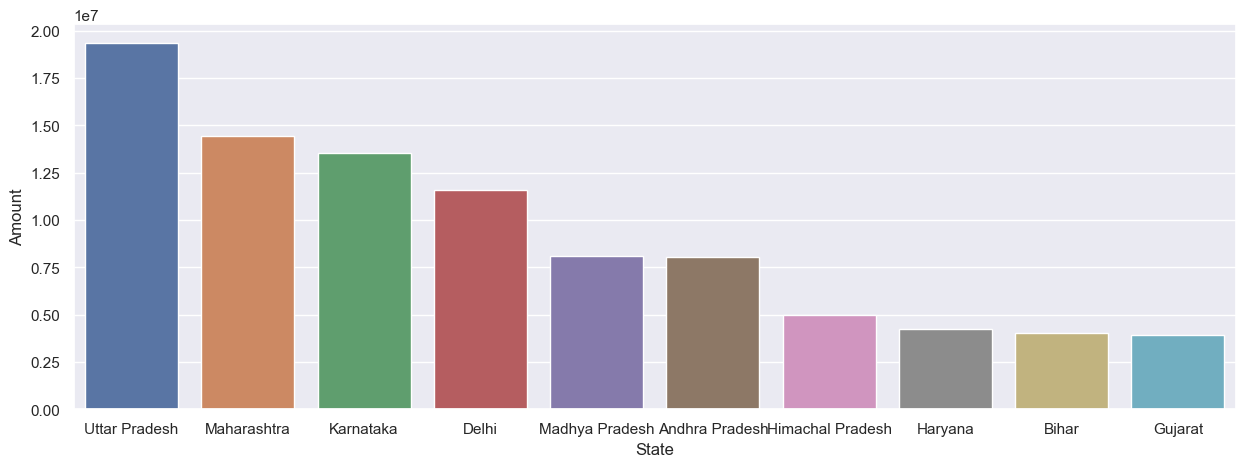

In [50]:
# Total number of Sales by top 10 states

state_sale = data.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Amount', data = state_sale)

#### Most of the orders are from Uttar Pradesh, Maharashtra and Karnataka respectively

### Sales by Marital Status

<Axes: xlabel='Marital_Status', ylabel='Amount'>

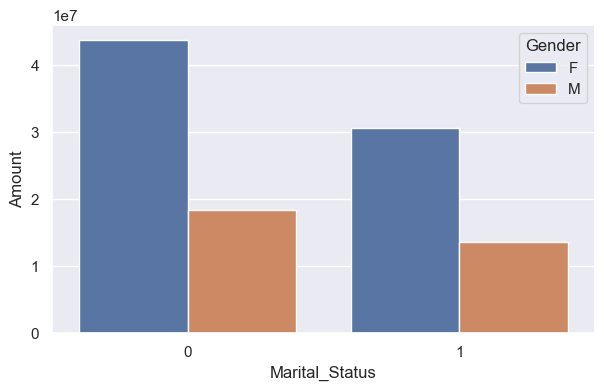

In [56]:
marital_sale = data.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',
                                                                                                        ascending = False)

sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(x = 'Marital_Status', y = 'Amount', hue = 'Gender', data = marital_sale)

#### Most of the buyers are married women having high purchasing power

### Sales by Occupation

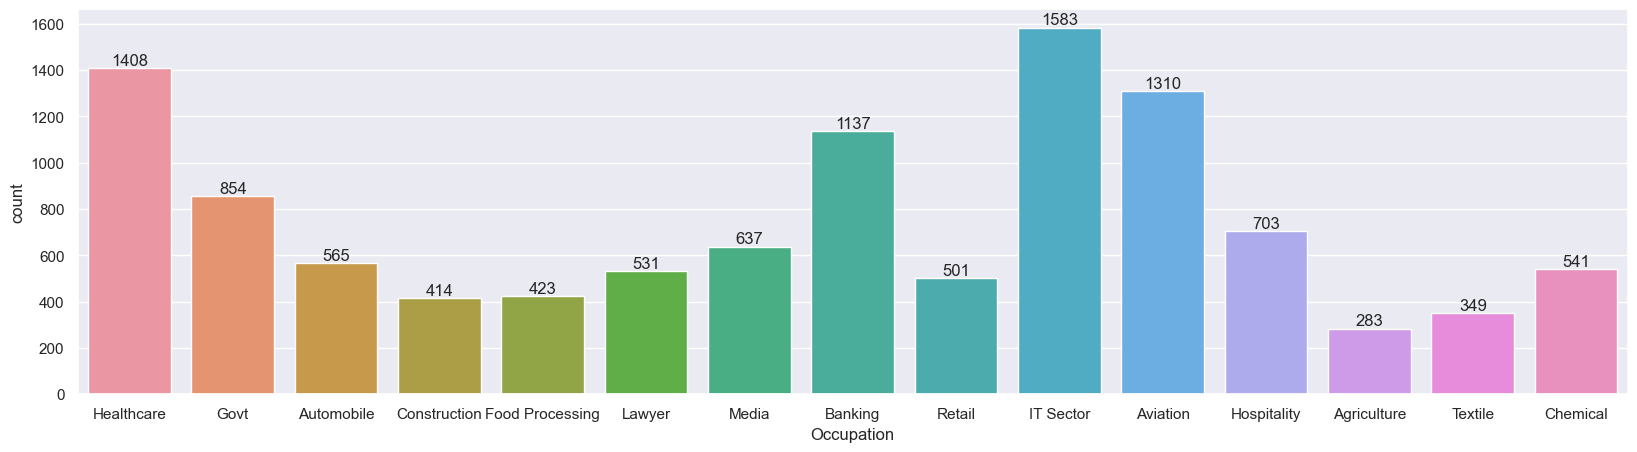

In [60]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(x = 'Occupation', data = data)

for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Occupation', ylabel='Amount'>

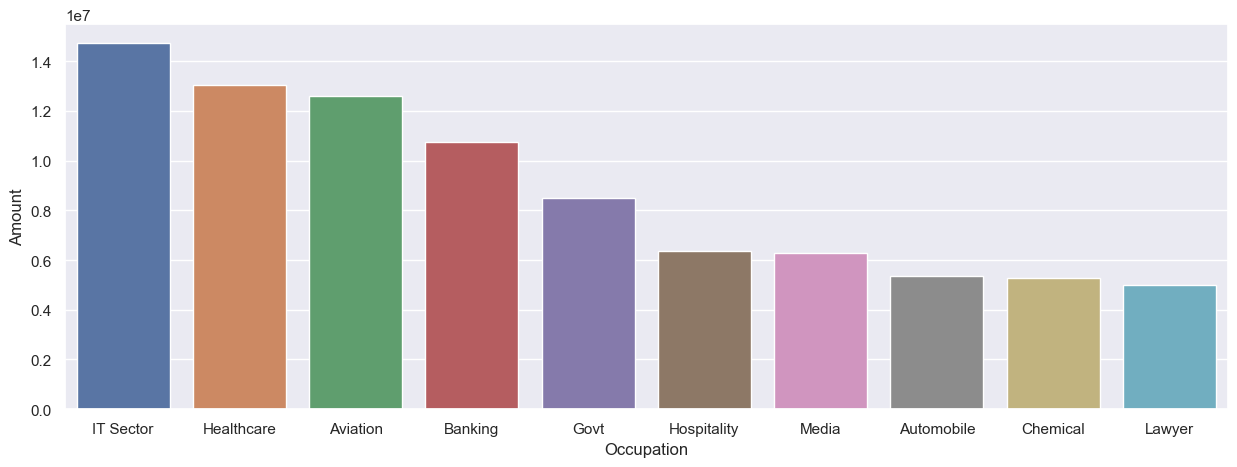

In [63]:
# Total number of Sales by top 10 Occupation

occupation_sale = data.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(x = 'Occupation', y = 'Amount', data = occupation_sale)

#### Most of the buyers are from IT, Healthcare and then Aviation

### Sales by Product Category

<Axes: xlabel='Product_Category', ylabel='Amount'>

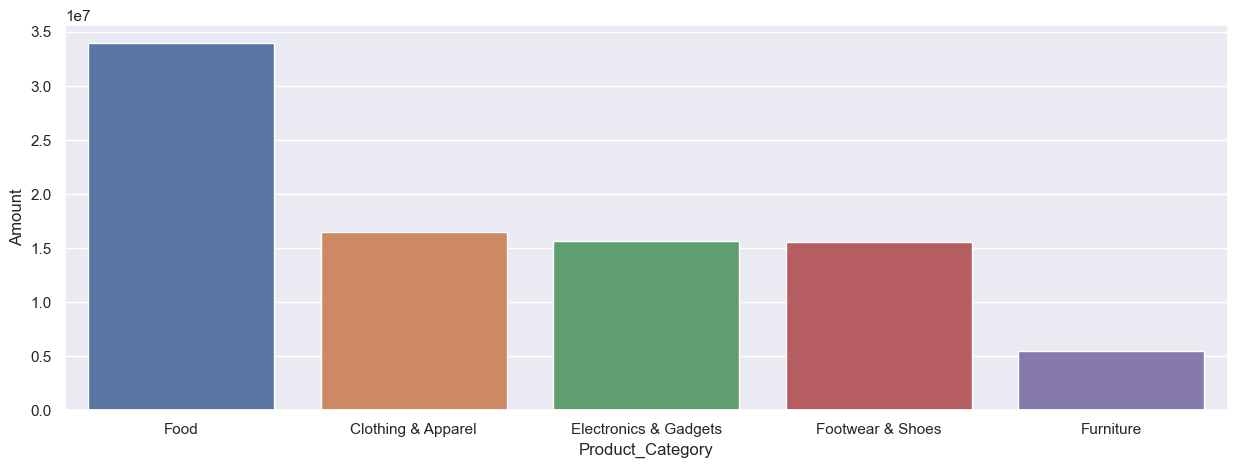

In [66]:
# Total number of Sales by top 5 Product Categories

category_sale = data.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(5)

sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(x = 'Product_Category', y = 'Amount', data = category_sale)

### Conclusion:

Married women of age group 26 - 35 years from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation have high purchasing power in the Food, Clothing and Electroic Categories